## Assignment for Week 7 - Performance Evaluations

### Project:
#### Performance Evaluations: ROC Curves

Bank Marketing data:  https://archive.ics.uci.edu/ml/datasets/bank+marketing. Use the bank-additional-full.csv.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

From the given data set, complete the following:
  * Try 3 different types of models to make classification predictions on the bank marketing dataset 
  * Calculate the AUC score as a comparison, and at least 2 other metrics (ie: accuracy, F1 score, precision, recall, etc)
      - Compare the models’ performance on the same train/test splits 
      - ## KNN Model: Accuracy score-89.19% with 6 clusters|Weighted precision-87%|Weighted F1-86%|AUC score-0.557
      - ## Logistic Regression Model: Accuracy score-89.36%|Weighted precision 87%|Weighted F1-86%|AUC score-0.557
      - ## Random Forest Model: Accuracy score-89.28%|Weighted precision 87%|Weighted F1-87%|AUC score-0.60

## For the scores listed above (also found in codeblocks 68-70) I went with weighted scores since per my understanding weighted scores account for class imbalance. Looks like random forest model has the highest AUC & F! scores, so I'll use random forest for the ROC curve plot.
      
      
  * Plot the ROC curve from the best model, choose what you think the best threshold value is for making predictions
  ## Optimal threshold of ~0.10 was devised by applying the Youden's index, which aims to maximize sensitivity & specificity (knowing sensitivity & specificity are inversely proportional). 

### Deliverables:

Upload your notebook's .ipynb file and pdf printouts.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# import the usual packages
from tpot import TPOTClassifier
from sklearn.datasets import load_digits

# Any results you write to the current directory are saved as output.
import timeit 

import warnings
warnings.filterwarnings("ignore")

C:\Users\jvill\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
# loading our data set
# last portion of code is meant to separate data 
bank = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank_copy = bank.copy()

In [6]:
bank_copy.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bank["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [8]:
bank["cons.conf.idx"].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

In [9]:
bank["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [10]:
bank["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [11]:
bank["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [12]:
bank["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [13]:
bank["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [14]:
bank["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [16]:
bank["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Converting many categorcial variable values to int's-as seen below I lumped "unknown" into the value with the highest count for each variable:

In [17]:
cleanup_nums = {"housing": {"yes": 1, "no": 0,"unknown": 1},
                "loan":    {"yes": 1, "no": 0,"unknown": 0},
                "default": {"yes": 1, "no": 0,"unknown": 0},
                "y":       {"yes": 1, "no": 0},
                "marital": {"married":0,"unknown":0,"single":1,"divorced":2},
                "job":     {"admin.":0,"unknown":0,"blue-collar":1,"technician":2,"services":3,"management":4,
                            "retired":5,"entrepreneur":6,"self-employed":7,"housemaid":8,"unemployed":9,
                            "student":10},
                "education": {"university.degree":0,"unknown":0,"high.school":1,"basic.9y":2,"professional.course":3,
                              "basic.4y":4,"basic.6y":5,"illiterate":6},
                "poutcome": {"nonexistent":0,"failure":1,"success":2}}

In [18]:
bank = bank.replace(cleanup_nums)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,8,0,4,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3,0,1,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3,0,1,0,1,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,5,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3,0,1,0,0,1,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [19]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [20]:
bank.describe()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.427455,0.504807,1.592843,0.000073,0.547878,0.151695,258.285010,2.567593,962.475454,0.172963,0.169904,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.600579,0.688431,1.567091,0.008534,0.497708,0.358729,259.279249,2.770014,186.910907,0.494901,0.455754,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,180.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,4.000000,1.000000,3.000000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


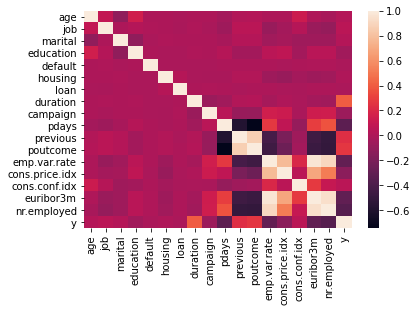

In [21]:
_ = sns.heatmap(bank.corr())

Per above, previous/job/poutcome/cons.conf.idx seem to have strongest correlation with y. Will drop rest of columns below including duration since per the data dictionary duration should be dropped if looking to come up with a predictive model:

In [22]:
# trimming our data
bank.drop(['age','default','cons.price.idx','housing','loan','pdays','contact','month','day_of_week','emp.var.rate', 
           'pdays', 'marital','duration','euribor3m','nr.employed','campaign','education'],axis=1, inplace=True)

In [23]:
bank.head(5)

,job,previous,poutcome,cons.conf.idx,y
0,8,0,0,-36.4,0
1,3,0,0,-36.4,0
2,3,0,0,-36.4,0
3,0,0,0,-36.4,0
4,3,0,0,-36.4,0


In [24]:
cols = bank.columns
target_col = 'y'
feat_cols = [c for c in cols if c != target_col]

X = bank[feat_cols].values
y = bank[target_col].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN Classifier Model

In [86]:
from sklearn.neighbors import KNeighborsClassifier
# define and fit model
model = KNeighborsClassifier(n_neighbors=6, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6)

In [87]:
# gather the predictions model made for test set
knnpreds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(knnpreds)

Actuals for test data set
[0 0 0 ... 0 1 0]
Predictions for test data set
[0 0 0 ... 0 0 0]


In [88]:
#compare the two sets for 'subscribed'
differs = y_test - knnpreds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[0 0 0 ... 0 1 0]


In [89]:
print(accuracy_score(y_test,knnpreds))

0.891964068948774


~89% accuracy of predicting y when using the features involved. KNN Confusion Matrix:

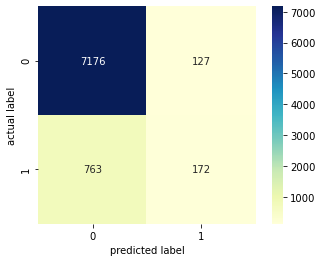

In [79]:
# make a confusion matrix to display the results
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knnpreds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

In [80]:
scores = []
print(f'Features ==> {feat_cols} \nTarget ====> {target_col}\n')

# remember the ending number for range is not inclusive
for k in range(1, 10):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features ==> ['job', 'previous', 'poutcome', 'cons.conf.idx'] 
Target ====> y

Evaluating 1 clusters
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters


In [81]:
scores

[0.8746054867686331,
 0.8839524156348628,
 0.8803107550376305,
 0.8900218499635834,
 0.8895362952172857,
 0.891964068948774,
 0.8892935178441369,
 0.8914785142024764,
 0.8897790725904345]

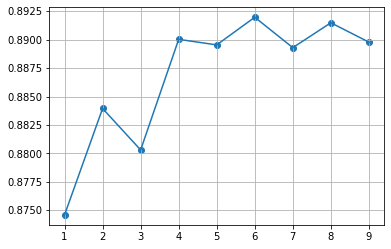

In [58]:
# display the resutls
plt.plot(range(1, 10), scores)
plt.scatter(range(1, 10), scores)
plt.grid()
_ =plt.xticks(range(1, 10))

Per above, 6 is the optimal k

## Logistic Regression Model

In [61]:
model = LogisticRegression()
model.fit(X_train, y_train)

#gathering the predictions
logregpreds = model.predict(X_test)

In [63]:
#display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(logregpreds)

Actuals for test data set
[0 0 0 ... 0 1 0]
Predictions for test data set
[0 0 0 ... 0 0 0]


In [64]:
#using the sklearn.metrics package to determine the accuracy of the model

print(accuracy_score(y_test,logregpreds))

0.8936635105608157


89.36% accuracy score for logistic regression model

## Random Forest Model

In [65]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_jobs = -1, random_state=41)
forest_model.fit(X_train,y_train)

#gathering the predictions
forest_preds = forest_model.predict(X_test)

In [66]:
#display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(forest_preds)

Actuals for test data set
[0 0 0 ... 0 1 0]
Predictions for test data set
[0 0 0 ... 0 0 0]


In [67]:
print(accuracy_score(y_test,forest_preds))

0.8928137897547949


89.28% accuracy score for random forest model

In [49]:
# display the importance features with our tree-big fan of this function!

importance_list = list(zip(feat_cols,forest_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
sorted_import_feature

[('cons.conf.idx', 0.5137386590258287),
 ('poutcome', 0.2689446868972321),
 ('job', 0.1424081285031928),
 ('previous', 0.07490852557374633)]

## Classification scores for all 3 models:

In [68]:
print(classification_report(y_test, knnpreds))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.67      0.12      0.21       935

    accuracy                           0.89      8238
   macro avg       0.79      0.56      0.58      8238
weighted avg       0.87      0.89      0.86      8238



In [69]:
print(classification_report(y_test, logregpreds))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.67      0.12      0.21       935

    accuracy                           0.89      8238
   macro avg       0.79      0.56      0.58      8238
weighted avg       0.87      0.89      0.86      8238



In [70]:
print(classification_report(y_test, forest_preds))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.57      0.22      0.32       935

    accuracy                           0.89      8238
   macro avg       0.74      0.60      0.63      8238
weighted avg       0.87      0.89      0.87      8238



## AUC Scores for all 3 models:

In [71]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, knnpreds))

0.55766328539806


In [72]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, logregpreds))

0.55766328539806


In [73]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, forest_preds))

0.6000831099372392


In [91]:
lr_proba = cross_val_predict(forest_model, X_train, y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

In [109]:
import numpy as np

def ROC_Curve(title, y_train, scores, label=None):
    from sklearn.metrics import roc_curve
    
    
    # calculate the ROC score
    # repurposed code provided in this article speaking to threshold moving: 
    # https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

Best Threshold=0.108738
AUC Score (Bank Marketing Campaign Subscriber Prediction): 0.76 


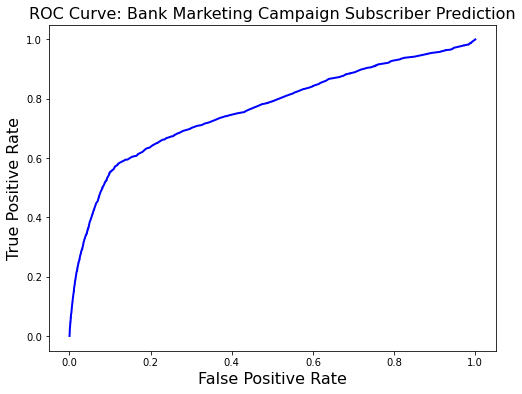

In [110]:
ROC_Curve('Bank Marketing Campaign Subscriber Prediction',y_train,lr_scores,)